# More Pandas

![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

Suppose you were interested in opening an animal shelter. To inform your planning, it would be useful to analyze data from other shelters to understand their operations. In this lecture, we'll analyze animal outcome data from the Austin Animal Center.  

## Objectives

- Apply and use `.map()`, `apply()`, and `.applymap()` from the `pandas` library
- Apply and use `.where()` and `.select()` from the `numpy` library
- Use lambda functions in coordination with the above functions
- Explain what a groupby object is and split a DataFrame using `.groupby()`

In [1]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

%matplotlib inline

# These next lines ensure that the notebook
# stays current with respect to active .py files.
# See here:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

%load_ext autoreload
%autoreload 2

## Loading the Data

Let's take a moment to download and to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

We can also ingest the data right off the web, as we do below. The code below will load data for the last 1000 animals to leave the center. 

In [2]:
url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
response = requests.get(url)
animals = pd.DataFrame(response.json())

In [5]:
response.json()

[{'animal_id': 'A829195',
  'datetime': '2021-02-08T13:26:00.000',
  'monthyear': '2021-02-08T13:26:00.000',
  'date_of_birth': '2019-02-04T00:00:00.000',
  'outcome_type': 'Euthanasia',
  'outcome_subtype': 'Suffering',
  'animal_type': 'Cat',
  'sex_upon_outcome': 'Intact Male',
  'age_upon_outcome': '2 years',
  'breed': 'Domestic Shorthair',
  'color': 'Orange Tabby'},
 {'animal_id': 'A829112',
  'datetime': '2021-02-07T18:46:00.000',
  'monthyear': '2021-02-07T18:46:00.000',
  'date_of_birth': '2020-11-17T00:00:00.000',
  'outcome_type': 'Transfer',
  'outcome_subtype': 'Partner',
  'animal_type': 'Dog',
  'sex_upon_outcome': 'Intact Female',
  'age_upon_outcome': '2 months',
  'breed': 'Pit Bull',
  'color': 'Brown Brindle/White'},
 {'animal_id': 'A825378',
  'name': 'Tita Tot',
  'datetime': '2021-02-07T17:44:00.000',
  'monthyear': '2021-02-07T17:44:00.000',
  'date_of_birth': '2016-11-02T00:00:00.000',
  'outcome_type': 'Adoption',
  'animal_type': 'Dog',
  'sex_upon_outcome':

# Exploratory Data Analysis (EDA)

Exploring a new dataset is essential for understanding what it contains. This will generate ideas for processing the data and questions to try to answer in futher analysis.

## Inspecting the Data

Let's take a look at a few rows of data.

In [6]:
animals.head()

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name
0,A829195,2021-02-08T13:26:00.000,2021-02-08T13:26:00.000,2019-02-04T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,2 years,Domestic Shorthair,Orange Tabby,NaN
1,A829112,2021-02-07T18:46:00.000,2021-02-07T18:46:00.000,2020-11-17T00:00:00.000,Transfer,Partner,Dog,Intact Female,2 months,Pit Bull,Brown Brindle/White,NaN
2,A825378,2021-02-07T17:44:00.000,2021-02-07T17:44:00.000,2016-11-02T00:00:00.000,Adoption,NaN,Dog,Spayed Female,4 years,Labrador Retriever Mix,Black/White,Tita Tot
3,A828450,2021-02-07T17:42:00.000,2021-02-07T17:42:00.000,2020-01-16T00:00:00.000,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,White/Black,Domino
4,A829121,2021-02-07T17:40:00.000,2021-02-07T17:40:00.000,2020-10-02T00:00:00.000,Adoption,NaN,Dog,Intact Female,4 months,Catahoula Mix,Blue Merle/Black,NaN


The `info()` and `describe()` provide a useful overview of the data.

In [7]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_id         1000 non-null   object
 1   datetime          1000 non-null   object
 2   monthyear         1000 non-null   object
 3   date_of_birth     1000 non-null   object
 4   outcome_type      991 non-null    object
 5   outcome_subtype   545 non-null    object
 6   animal_type       1000 non-null   object
 7   sex_upon_outcome  1000 non-null   object
 8   age_upon_outcome  1000 non-null   object
 9   breed             1000 non-null   object
 10  color             1000 non-null   object
 11  name              729 non-null    object
dtypes: object(12)
memory usage: 93.9+ KB


In [8]:
animals.describe()

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name
count,1000,1000,1000,1000,991,545,1000,1000,1000,1000,1000,729
unique,971,906,906,560,8,10,4,5,32,195,112,630
top,A828197,2021-01-30T17:15:00.000,2021-01-30T17:15:00.000,2020-10-26T00:00:00.000,Adoption,Foster,Dog,Neutered Male,2 years,Domestic Shorthair,Black/White,Max
freq,3,6,6,13,540,247,575,415,209,215,113,9


In [9]:
# Use value counts to check a categorical feature's distribution

animals['color'].value_counts()

Black/White        113
Black               75
Brown Tabby         67
White               43
Brown/White         43
                  ... 
Lilac Point          1
Silver/White         1
Tortie/Tortie        1
White/Blue Tick      1
Fawn                 1
Name: color, Length: 112, dtype: int64

Now that we have a sense of the data available to us, we can focus in on some more specific questions to dig into. These questions may or may not be directly relevant to your goal (e.g. helping plan a new shelter), but will always help you gain a better understanding of your data.

In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.  

## Question 1: What animal types are in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

    What features do we need?
     - "animal_type"
    What type of logic and calculation do we perform?
     - Let's use `.value_counts()` to count the different animal types
    What type of visualization would help us answer the question?
     - A bar chart would be good for this purpose

In [10]:
animals['animal_type'].value_counts()

Dog      575
Cat      361
Other     55
Bird       9
Name: animal_type, dtype: int64

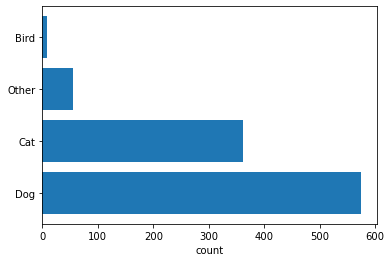

In [11]:
fig, ax = plt.subplots()

ax.barh(animals['animal_type'].value_counts().index,
        width=animals['animal_type'].value_counts().values)
ax.set_xlabel('count');

<AxesSubplot:>

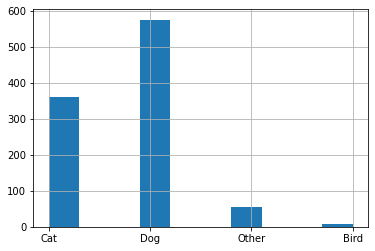

In [12]:
animals['animal_type'].hist()

Questions lead to other questions. For the above example, the visualization raises the question...

## Question 2: What "Other" animals are in the dataset?

To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.   
    
**Discussion**: Where might we look to find animal types within the Other category?

<details>
    <summary>
        Answer
    </summary>
        The breed column.
</details>

In [13]:
# Your exploration here
animals['breed'].value_counts()

Domestic Shorthair             215
Domestic Shorthair Mix          90
Pit Bull                        47
Chihuahua Shorthair             39
Labrador Retriever Mix          35
                              ... 
Pointer Mix                      1
Beagle/Chihuahua Shorthair       1
Greyhound Mix                    1
Soft Coated Wheaten Terrier      1
Basenji/Australian Kelpie        1
Name: breed, Length: 195, dtype: int64

Let's use that column to answer our question.

In [15]:
animals[animals['animal_type'] == 'Other']['breed'].value_counts()

# returns vlaue counts for all animals that were classified as other in the 'animal_type' column

Hamster         16
Bat             13
Raccoon          7
Fox              6
Guinea Pig       5
Rabbit Sh        3
Skunk            3
Lizard           1
Lop-Mini Mix     1
Name: breed, dtype: int64

In [14]:
animals['animal_type'] == 'Other'

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: animal_type, Length: 1000, dtype: bool

## Question 3: How old are the animals in our dataset?

Let's try to answer this with the `age_upon_outcome` variable to learn some new `pandas` tools.

In [16]:
animals['age_upon_outcome'].value_counts()

2 years      209
1 year       167
2 months      96
3 years       69
4 months      54
3 months      53
6 months      38
5 months      31
4 years       29
1 month       28
5 years       26
8 months      23
10 months     21
8 years       20
7 years       17
10 years      17
6 years       17
7 months      13
9 years       11
9 months       9
11 months      9
12 years       8
13 years       7
2 days         7
11 years       6
14 years       4
2 weeks        3
1 weeks        3
4 weeks        2
15 years       1
20 years       1
NULL           1
Name: age_upon_outcome, dtype: int64

### `Series.map()` and `Series.apply()`

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary - usually we'll use functions.

The `.apply()` method is similar to the `.map()` method for Series, but can only use functions. It has more powerful uses when working with DataFrames.

In [17]:
def one_year(age):
    if age == '1 year':
        return '1 years'
    else:
        return age

In [18]:
animals['new_age1'] = animals['age_upon_outcome'].map(one_year)
animals['new_age1'].value_counts()

2 years      209
1 years      167
2 months      96
3 years       69
4 months      54
3 months      53
6 months      38
5 months      31
4 years       29
1 month       28
5 years       26
8 months      23
10 months     21
8 years       20
7 years       17
10 years      17
6 years       17
7 months      13
9 years       11
9 months       9
11 months      9
12 years       8
13 years       7
2 days         7
11 years       6
14 years       4
2 weeks        3
1 weeks        3
4 weeks        2
15 years       1
20 years       1
NULL           1
Name: new_age1, dtype: int64

### Slower Than `numpy`

In general, `np.where()` and `np.select()` are faster:

In [19]:
animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year',
                              '1 years', animals['age_upon_outcome'])
animals['new_age2']

0       2 years
1      2 months
2       4 years
3       1 years
4      4 months
         ...   
995     2 years
996    5 months
997     1 years
998     2 years
999    2 months
Name: new_age2, Length: 1000, dtype: object

In [20]:
(animals['new_age1'] != animals['new_age2']).sum()

0

In [21]:
%timeit animals['new_age1'] = animals['age_upon_outcome'].map(one_year)

1.08 ms ± 263 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%timeit animals['new_age2'] = np.where(animals['age_upon_outcome'] == '1 year', \
                              '1 years', animals['age_upon_outcome'])

654 µs ± 91.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### More Sophisticated Mapping

Let's use `.map()` to turn sex_upon_outcome into a category with three values (called **ternary**): male, female, or unknown. 

First, explore the unique values:

In [23]:
animals['sex_upon_outcome'].unique()

array(['Intact Male', 'Intact Female', 'Spayed Female', 'Neutered Male',
       'Unknown'], dtype=object)

In [24]:
def sex_mapper(status):
    if status in ['Neutered Male', 'Intact Male']:
        return 'Male'
    elif status in ['Spayed Female', 'Intact Female']:
        return 'Female'
    else:
        return 'Unknown'

In [25]:
animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)
animals['new_sex1']

0        Male
1      Female
2      Female
3        Male
4      Female
        ...  
995    Female
996    Female
997      Male
998    Female
999    Female
Name: new_sex1, Length: 1000, dtype: object

In [26]:
animals['new_sex1'].value_counts()

Male       523
Female     423
Unknown     54
Name: new_sex1, dtype: int64

Again, `numpy` will be faster:

In [27]:
conditions = [animals['sex_upon_outcome'] == 'Neutered Male',
             animals['sex_upon_outcome'] == 'Intact Male',
             animals['sex_upon_outcome'] == 'Spayed Female',
             animals['sex_upon_outcome'] == 'Intact Female',
             animals['sex_upon_outcome'] == 'Unknown',
             animals['sex_upon_outcome'] == 'NULL']

choices = ['Male', 'Male', 'Female', 'Female', 'Unknown', 'Unknown']

In [28]:
animals['new_sex2'] = np.select(conditions, choices)
animals['new_sex2']

0        Male
1      Female
2      Female
3        Male
4      Female
        ...  
995    Female
996    Female
997      Male
998    Female
999    Female
Name: new_sex2, Length: 1000, dtype: object

In [29]:
(animals['new_sex1'] != animals['new_sex2']).sum()

0

In [30]:
%timeit animals['new_sex1'] = animals['sex_upon_outcome'].map(sex_mapper)

985 µs ± 268 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit animals['new_sex2'] = np.select(conditions, choices)

848 µs ± 291 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Lambda Functions

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [32]:
animals[animals['animal_type'] == 'Other']

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name,new_age1,new_age2,new_sex1,new_sex2
9,A829221,2021-02-07T09:10:00.000,2021-02-07T09:10:00.000,2019-02-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,NaN,2 years,2 years,Unknown,Unknown
43,A829212,2021-02-05T08:03:00.000,2021-02-05T08:03:00.000,2019-02-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,NaN,2 years,2 years,Unknown,Unknown
69,A829194,2021-02-04T10:51:00.000,2021-02-04T10:51:00.000,2020-02-04T00:00:00.000,Disposal,NaN,Other,Unknown,1 year,Bat,Black,NaN,1 years,1 years,Unknown,Unknown
96,A829138,2021-02-03T08:46:00.000,2021-02-03T08:46:00.000,2020-02-02T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,1 year,Bat,Brown,NaN,1 years,1 years,Unknown,Unknown
110,A828912,2021-02-02T13:17:00.000,2021-02-02T13:17:00.000,2019-01-28T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,NaN,2 years,2 years,Unknown,Unknown
153,A828913,2021-01-31T09:20:00.000,2021-01-31T09:20:00.000,2019-01-28T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Bat,Brown/Brown,NaN,2 years,2 years,Unknown,Unknown
164,A828640,2021-01-30T16:35:00.000,2021-01-30T16:35:00.000,2020-06-22T00:00:00.000,Adoption,Foster,Other,Unknown,7 months,Lop-Mini Mix,Sable,Blossom,7 months,7 months,Unknown,Unknown
204,A828945,2021-01-29T14:37:00.000,2021-01-29T14:37:00.000,2020-08-29T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,5 months,Skunk,Black/White,NaN,5 months,5 months,Unknown,Unknown
223,A828742,2021-01-28T14:57:00.000,2021-01-28T14:57:00.000,2019-01-26T00:00:00.000,Transfer,Partner,Other,Intact Male,2 years,Lizard,Brown,NaN,2 years,2 years,Male,Male
241,A828889,2021-01-28T10:36:00.000,2021-01-28T10:36:00.000,2020-01-28T00:00:00.000,Euthanasia,Suffering,Other,Unknown,1 year,Raccoon,Black/Gray,NaN,1 years,1 years,Unknown,Unknown


In [33]:
animals['animal_type'].value_counts()

Dog      575
Cat      361
Other     55
Bird       9
Name: animal_type, dtype: int64

In [34]:
animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x).value_counts()

Dog     575
Cat     361
Bird      9
Name: animal_type, dtype: int64

## Methods for Re-Organizing DataFrames: `.groupby()`

The `.groupby()` method lets you group together subsets of data so you can apply functions to groups.

It is most useful when we have numeric data that we want to **aggregate**, meaning that we want to combine multiple observations together into a new, summary observation. 

Let's create a numeric variable by turning "age_upon_outcome" into a number of days.

This method is similar to the GROUP BY statement in SQL, which we'll discuss soon.

In [35]:
animals['age_split'] = animals['new_age1'].str.split(" ")
animals['age_split']

0       [2, years]
1      [2, months]
2       [4, years]
3       [1, years]
4      [4, months]
          ...     
995     [2, years]
996    [5, months]
997     [1, years]
998     [2, years]
999    [2, months]
Name: age_split, Length: 1000, dtype: object

In [36]:
def count_days(x):
    """
    This function will convert ages into numbers of days.
    """
    if x[-1] == 'days':
        return int(x[0])
    elif x[-1] == 'weeks':
        return int(x[0]) * 7
    elif x[-1] == 'months':
        return int(x[0]) * 30
    elif x[-1] == 'years':
        return int(x[0]) * 365
    else:
        return np.nan

In [37]:
animals['age_days'] = animals['age_split'].map(count_days).astype(float)
animals['age_days']

0       730.0
1        60.0
2      1460.0
3       365.0
4       120.0
        ...  
995     730.0
996     150.0
997     365.0
998     730.0
999      60.0
Name: age_days, Length: 1000, dtype: float64

In [38]:
animals.groupby('animal_type').mean()

,age_days
animal_type,
Bird,405.555556
Cat,711.031250
Dog,929.533333
Other,371.618182


Notice the object type [DataFrameGroupBy](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) object. 

In [39]:
type(animals.groupby('animal_type'))

pandas.core.groupby.generic.DataFrameGroupBy

### .groups and .get_group()

In [40]:
# This retuns a dictionary with each group 
# indexed by the group name, along with the 
# row indices for each animal in the group.

animals.groupby('animal_type').groups

{'Bird': [449, 450, 633, 634, 635, 838, 839, 840, 930], 'Cat': [0, 13, 14, 17, 20, 24, 25, 26, 33, 36, 39, 46, 47, 56, 66, 67, 68, 71, 72, 73, 74, 76, 77, 83, 85, 86, 88, 89, 95, 98, 104, 106, 111, 112, 118, 119, 120, 121, 122, 125, 126, 127, 128, 129, 131, 140, 141, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 172, 177, 180, 187, 188, 197, 199, 202, 205, 206, 209, 211, 212, 213, 215, 218, 220, 224, 228, 229, 247, 250, 252, 254, 255, 256, 261, 262, 263, 264, 269, 273, 275, 277, 280, 281, 283, 286, 287, 288, 289, 294, ...], 'Dog': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 18, 19, 21, 22, 23, 27, 28, 29, 30, 31, 32, 34, 35, 37, 38, 40, 41, 42, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 70, 75, 78, 79, 80, 81, 82, 84, 87, 90, 91, 92, 93, 94, 97, 99, 100, 101, 102, 103, 105, 107, 108, 109, 113, 114, 115, 116, 117, 123, 124, 130, 132, 133, 134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, ...], 'Other': [9, 43, 69, 

In [41]:
animals.groupby('animal_type').get_group('Dog')

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name,new_age1,new_age2,new_sex1,new_sex2,age_split,age_days
1,A829112,2021-02-07T18:46:00.000,2021-02-07T18:46:00.000,2020-11-17T00:00:00.000,Transfer,Partner,Dog,Intact Female,2 months,Pit Bull,Brown Brindle/White,NaN,2 months,2 months,Female,Female,"[2, months]",60.0
2,A825378,2021-02-07T17:44:00.000,2021-02-07T17:44:00.000,2016-11-02T00:00:00.000,Adoption,NaN,Dog,Spayed Female,4 years,Labrador Retriever Mix,Black/White,Tita Tot,4 years,4 years,Female,Female,"[4, years]",1460.0
3,A828450,2021-02-07T17:42:00.000,2021-02-07T17:42:00.000,2020-01-16T00:00:00.000,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull,White/Black,Domino,1 years,1 years,Male,Male,"[1, years]",365.0
4,A829121,2021-02-07T17:40:00.000,2021-02-07T17:40:00.000,2020-10-02T00:00:00.000,Adoption,NaN,Dog,Intact Female,4 months,Catahoula Mix,Blue Merle/Black,NaN,4 months,4 months,Female,Female,"[4, months]",120.0
5,A829183,2021-02-07T16:52:00.000,2021-02-07T16:52:00.000,2017-02-04T00:00:00.000,Euthanasia,Suffering,Dog,Intact Female,4 years,Maltese/Yorkshire Terrier,Cream,Chica,4 years,4 years,Female,Female,"[4, years]",1460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,A827212,2020-12-21T17:28:00.000,2020-12-21T17:28:00.000,2018-12-16T00:00:00.000,Adoption,NaN,Dog,Neutered Male,2 years,Siberian Husky,Red/White,*Ol'Mcdonald,2 years,2 years,Male,Male,"[2, years]",730.0
995,A827280,2020-12-21T17:22:00.000,2020-12-21T17:22:00.000,2018-12-17T00:00:00.000,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair,Tan,NaN,2 years,2 years,Female,Female,"[2, years]",730.0
996,A827258,2020-12-21T17:04:00.000,2020-12-21T17:04:00.000,2020-07-17T00:00:00.000,Adoption,NaN,Dog,Spayed Female,5 months,German Shepherd,Brown/Black,NaN,5 months,5 months,Female,Female,"[5, months]",150.0
997,A827368,2020-12-21T16:56:00.000,2020-12-21T16:56:00.000,2019-12-01T00:00:00.000,Return to Owner,NaN,Dog,Intact Male,1 year,German Shepherd,Brown/Black,Cash,1 years,1 years,Male,Male,"[1, years]",365.0


We can group by multiple columns, and also return a DataFrameGroupBy object

In [42]:
animals.groupby(['animal_type', 'outcome_type'])

In [43]:
animals.groupby(['animal_type', 'outcome_type']).groups.keys()

dict_keys([('Cat', 'Euthanasia'), ('Dog', 'Transfer'), ('Dog', 'Adoption'), ('Dog', 'Euthanasia'), ('Dog', 'Return to Owner'), ('Other', 'Euthanasia'), ('Cat', 'Transfer'), ('Cat', 'Adoption'), ('Other', 'Disposal'), ('Cat', nan), ('Cat', 'Return to Owner'), ('Dog', nan), ('Dog', 'Rto-Adopt'), ('Dog', 'Disposal'), ('Other', 'Adoption'), ('Cat', 'Disposal'), ('Cat', 'Rto-Adopt'), ('Other', 'Transfer'), ('Dog', 'Died'), ('Cat', 'Died'), ('Other', 'Missing'), ('Bird', 'Adoption'), ('Bird', 'Transfer'), ('Bird', 'Died')])

In [44]:
# We can then get a specific group, such as cats that were adopted

animals.groupby(['animal_type', 'outcome_type']).get_group(('Cat', 'Adoption'))

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name,new_age1,new_age2,new_sex1,new_sex2,age_split,age_days
14,A828615,2021-02-06T14:30:00.000,2021-02-06T14:30:00.000,2019-01-21T00:00:00.000,Adoption,NaN,Cat,Spayed Female,2 years,Domestic Shorthair,Blue Tabby,Thunder,2 years,2 years,Female,Female,"[2, years]",730.0
17,A828026,2021-02-06T12:49:00.000,2021-02-06T12:49:00.000,2020-01-05T00:00:00.000,Adoption,Foster,Cat,Neutered Male,1 year,Domestic Shorthair,Brown Tabby,*Simon,1 years,1 years,Male,Male,"[1, years]",365.0
20,A829050,2021-02-06T11:50:00.000,2021-02-06T11:50:00.000,2013-02-01T00:00:00.000,Adoption,Foster,Cat,Neutered Male,8 years,Domestic Shorthair,White,*Kirby,8 years,8 years,Male,Male,"[8, years]",2920.0
36,A821320,2021-02-05T12:17:00.000,2021-02-05T12:17:00.000,2020-08-06T00:00:00.000,Adoption,Foster,Cat,Neutered Male,6 months,Domestic Shorthair,White/Blue,*Inky,6 months,6 months,Male,Male,"[6, months]",180.0
46,A823024,2021-02-04T17:25:00.000,2021-02-04T17:25:00.000,2020-08-21T00:00:00.000,Adoption,NaN,Cat,Spayed Female,5 months,Domestic Shorthair Mix,Brown Tabby,Magnolia,5 months,5 months,Female,Female,"[5, months]",150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,A825934,2020-12-22T07:27:00.000,2020-12-22T07:27:00.000,2020-09-24T00:00:00.000,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair,Black/White,*Barada,2 months,2 months,Female,Female,"[2, months]",60.0
987,A823534,2020-12-22T00:00:00.000,2020-12-22T00:00:00.000,2020-08-10T00:00:00.000,Adoption,Foster,Cat,Neutered Male,4 months,Domestic Shorthair,White/Cream Tabby,*Habanero,4 months,4 months,Male,Male,"[4, months]",120.0
991,A826834,2020-12-21T17:55:00.000,2020-12-21T17:55:00.000,2020-09-24T00:00:00.000,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair,Calico,NaN,2 months,2 months,Female,Female,"[2, months]",60.0
994,A827319,2020-12-21T17:25:00.000,2020-12-21T17:25:00.000,2020-06-18T00:00:00.000,Adoption,NaN,Cat,Neutered Male,6 months,Domestic Shorthair Mix,Brown Tabby,Wally,6 months,6 months,Male,Male,"[6, months]",180.0


## Aggregating

In [45]:
# Just like with single axis groups, we can aggregate on multiple axes

animals.groupby(['animal_type', 'outcome_type']).mean()

age_days
animal_type outcome_type                
Bird        Adoption          365.000000
            Died              730.000000
            Transfer          365.000000
Cat         Adoption          516.031390
            Died              150.000000
            Disposal          365.000000
            Euthanasia       1439.444444
            Return to Owner  1019.333333
            Rto-Adopt        1054.166667
            Transfer         1035.343750
Dog         Adoption          737.491409
            Died              120.000000
            Disposal           60.000000
            Euthanasia       1241.000000
            Return to Owner  1393.790323
            Rto-Adopt        1137.857143
            Transfer          894.447368
Other       Adoption          340.000000
            Disposal          547.500000
            Euthanasia        502.400000
            Missing            90.000000
            Transfer          150.642857

## `.agg()`

Use the `.agg()` method to specify in more detail the variables you want to aggregate and the aggregation functions you want to use.

In [46]:
animals.groupby(['animal_type', 'outcome_type']).agg({'age_days': ['mean', 'max']})

age_days        
                                    mean     max
animal_type outcome_type                        
Bird        Adoption          365.000000   365.0
            Died              730.000000   730.0
            Transfer          365.000000   365.0
Cat         Adoption          516.031390  5110.0
            Died              150.000000   150.0
            Disposal          365.000000   365.0
            Euthanasia       1439.444444  4380.0
            Return to Owner  1019.333333  5475.0
            Rto-Adopt        1054.166667  2555.0
            Transfer         1035.343750  4745.0
Dog         Adoption          737.491409  5110.0
            Died              120.000000   120.0
            Disposal           60.000000    60.0
            Euthanasia       1241.000000  4015.0
            Return to Owner  1393.790323  7300.0
            Rto-Adopt        1137.857143  3650.0
            Transfer          894.447368  5110.0
Other       Adoption          340.000000   730.0
            Disposal          547.500000   730.0
            Euthanasia        502.400000   730.0
            Missing            90.000000    90.0
            Transfer          150.642857   730.0

## Level Up: `.applymap()`

`.applymap()` is used to apply a transformation to each element of a DataFrame.

In [47]:
# This line will apply the base `type()` function to 
# all entries of the DataFrame.

animals.applymap(type)

,animal_id,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,name,new_age1,new_age2,new_sex1,new_sex2,age_split,age_days
0,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
1,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
2,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
3,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
4,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
996,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
997,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
998,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'list'>,<class 'float'>
